First, you'll work with a dataset containing the number of primary care physicians per county for each county in the United States. It was obtained from the Area Health Resources File, published by the [Health Resources and Services Administration](https://data.hrsa.gov/topics/health-workforce/ahrf). This data is contained in the file `primary_care_physicians.csv`.

Second, the file `population_by_county.csv` contains the Census Bureau's 2019 population estimates for each US County. It also contains a column `urban`. The `urban` column uses data from the National Bureau of Economic Research to classify each county as either urban or rural. The U.S. Office of Management and Budget designates counties as metropolitan (a core urban area of 50,000 or more population), micropolitan (an urban core of at least 10,000 but less than 50,000 population), or neither. Here, a county is considered "urban" if it is part of a metropolitan or micropolitan area and "rural" if it is not.

In [101]:
import pandas as pd

1. First, import the primary care physicians dataset (`primary_care_physicians.csv`) into a data frame named `physicians`. 
 2. Filter `physicians` down to just the counties in Tennessee. Save the filtered dataframe back to `physicians`. Verify that the resulting dataframe has 95 rows.

In [102]:
physicians = pd.read_csv('../data/primary_care_physicians.csv')

In [103]:
physicians.head()

,FIPS,state,county,primary_care_physicians
0,1001,Alabama,Autauga,26.0
1,1003,Alabama,Baldwin,153.0
2,1005,Alabama,Barbour,8.0
3,1007,Alabama,Bibb,12.0
4,1009,Alabama,Blount,12.0


In [104]:
physicians = physicians.loc[physicians['state'] == 'Tennessee']

In [105]:
physicians = physicians[['county', 'primary_care_physicians']]

In [106]:
physicians

,county,primary_care_physicians
2432,Anderson,39.0
2433,Bedford,15.0
2434,Benton,3.0
2435,Bledsoe,1.0
2436,Blount,90.0
...,...,...
2522,Wayne,5.0
2523,Weakley,18.0
2524,White,9.0
2525,Williamson,338.0


Look at the distribution of the number of primary care physicians. What do you notice?



In [107]:
physicians['primary_care_physicians'].value_counts()

2.0      8
5.0      7
9.0      5
3.0      4
1.0      4
18.0     4
12.0     4
4.0      4
0.0      4
6.0      3
15.0     3
21.0     3
8.0      2
26.0     2
38.0     2
14.0     2
39.0     2
23.0     2
22.0     2
19.0     2
665.0    1
129.0    1
338.0    1
226.0    1
17.0     1
91.0     1
199.0    1
806.0    1
137.0    1
52.0     1
90.0     1
82.0     1
53.0     1
30.0     1
55.0     1
40.0     1
520.0    1
7.0      1
13.0     1
403.0    1
16.0     1
11.0     1
37.0     1
27.0     1
10.0     1
43.0     1
Name: primary_care_physicians, dtype: int64

In [108]:
physicians['primary_care_physicians'].nunique()

46

In [109]:
physicians['primary_care_physicians'].unique()

array([ 39.,  15.,   3.,   1.,  90.,  55.,  19.,  12.,  22.,  23.,   4.,
         2.,  16.,  37.,   0.,  40., 665.,   9.,  14.,  10.,  27.,  21.,
        11.,   5.,  38., 403.,  13.,   7.,   6., 520.,  18.,  30.,  26.,
       129.,  53.,  82.,   8.,  52., 137., 806., 199.,  91.,  17., 226.,
       338.,  43.])

In [110]:
physicians.describe()

,primary_care_physicians
count,95.000000
mean,51.042105
std,129.311426
min,0.000000
25%,4.500000
50%,12.000000
75%,26.500000
max,806.000000


Most TN counties have few physicians

Now, import the population by county dataset (`population_by_county.csv`) into a DataFrame named `population`.
 5. Merge the `physicians` DataFrame with the `population` DataFrame. Keep only the values for Tennessee. When you merge, be sure the include both the `population` and `urban` columns in the merged results. Save the result of the merge back to `physicians`.
 6. How many Tennessee counties are considered urban?

In [111]:
population = pd.read_csv('../data/population_by_county.csv')

In [112]:
population

,FIPS,population,county,state,urban
0,17051,21565,Fayette County,ILLINOIS,Rural
1,17107,29003,Logan County,ILLINOIS,Rural
2,17165,23994,Saline County,ILLINOIS,Rural
3,17097,701473,Lake County,ILLINOIS,Urban
4,17127,14219,Massac County,ILLINOIS,Rural
...,...,...,...,...,...
3197,47033,14399,Crockett County,TENNESSEE,Rural
3198,47095,7401,Lake County,TENNESSEE,Rural
3199,47093,461104,Knox County,TENNESSEE,Urban
3200,53005,197518,Benton County,WASHINGTON,Urban


In [113]:
population['county'].str.split(' County', expand = True)

,0,1
0,Fayette,
1,Logan,
2,Saline,
3,Lake,
4,Massac,
...,...,...
3197,Crockett,
3198,Lake,
3199,Knox,
3200,Benton,


In [114]:
population['county']=population['county'].str.split(' County', expand = True)[0]

In [115]:
population

,FIPS,population,county,state,urban
0,17051,21565,Fayette,ILLINOIS,Rural
1,17107,29003,Logan,ILLINOIS,Rural
2,17165,23994,Saline,ILLINOIS,Rural
3,17097,701473,Lake,ILLINOIS,Urban
4,17127,14219,Massac,ILLINOIS,Rural
...,...,...,...,...,...
3197,47033,14399,Crockett,TENNESSEE,Rural
3198,47095,7401,Lake,TENNESSEE,Rural
3199,47093,461104,Knox,TENNESSEE,Urban
3200,53005,197518,Benton,WASHINGTON,Urban


In [116]:
population = population.loc[population['state'] == 'TENNESSEE']

In [117]:
population

,FIPS,population,county,state,urban
283,47165,183437,Sumner,TENNESSEE,Urban
284,47169,10231,Trousdale,TENNESSEE,Urban
285,47027,7654,Clay,TENNESSEE,Rural
405,47157,936374,Shelby,TENNESSEE,Urban
406,47077,27977,Henderson,TENNESSEE,Rural
...,...,...,...,...,...
3195,47123,46064,Monroe,TENNESSEE,Rural
3196,47079,32284,Henry,TENNESSEE,Rural
3197,47033,14399,Crockett,TENNESSEE,Rural
3198,47095,7401,Lake,TENNESSEE,Rural


In [118]:
population['state'].str.replace('TENNESSEE', 'Tennessee')

283     Tennessee
284     Tennessee
285     Tennessee
405     Tennessee
406     Tennessee
          ...    
3195    Tennessee
3196    Tennessee
3197    Tennessee
3198    Tennessee
3199    Tennessee
Name: state, Length: 95, dtype: object

In [119]:
merge = pd.merge(left = population[['population', 'county', 'state', 'urban']],
         right = physicians[['county', 'primary_care_physicians']])

In [120]:
merge

,population,county,state,urban,primary_care_physicians
0,183437,Sumner,TENNESSEE,Urban,91.0
1,10231,Trousdale,TENNESSEE,Urban,2.0
2,7654,Clay,TENNESSEE,Rural,2.0
3,936374,Shelby,TENNESSEE,Urban,806.0
4,27977,Henderson,TENNESSEE,Rural,7.0
...,...,...,...,...,...
90,46064,Monroe,TENNESSEE,Rural,9.0
91,32284,Henry,TENNESSEE,Rural,22.0
92,14399,Crockett,TENNESSEE,Rural,0.0
93,7401,Lake,TENNESSEE,Rural,0.0


In [121]:
physicians = merge

In [122]:
physicians

,population,county,state,urban,primary_care_physicians
0,183437,Sumner,TENNESSEE,Urban,91.0
1,10231,Trousdale,TENNESSEE,Urban,2.0
2,7654,Clay,TENNESSEE,Rural,2.0
3,936374,Shelby,TENNESSEE,Urban,806.0
4,27977,Henderson,TENNESSEE,Rural,7.0
...,...,...,...,...,...
90,46064,Monroe,TENNESSEE,Rural,9.0
91,32284,Henry,TENNESSEE,Rural,22.0
92,14399,Crockett,TENNESSEE,Rural,0.0
93,7401,Lake,TENNESSEE,Rural,0.0


In [123]:
urban_count = physicians.loc[physicians['urban'] == 'Urban']

In [124]:
urban_count['urban'].value_counts()

Urban    38
Name: urban, dtype: int64

How many Tennessee counties are considered urban?

38 counties are considered urban

In [125]:
rural_count = physicians.loc[physicians['urban'] == 'Rural']

In [126]:
rural_count['urban'].value_counts()

Rural    57
Name: urban, dtype: int64

The State Health Access Data Assistance Center (SHADAC) (https://www.shadac.org/) classifies counties into three groups based on the number of residents per primary care physician. First, counties with fewer than 1500 residents per primary care physician are considered to have an "adequate" supply. Counties with at least 1500 residents but fewer than 3500 residents per primary care physician are considered to have a "moderately inadequate" supply, and counties with at least 3500 residents per primary care physician are considered to have a "low inadequate" supply. How many counties in Tennessee are in each group? 
 8. Does there appear to be any detectable relationship between whether a county is urban or rural and its supply of primary care physicians?

In [127]:
ratio = physicians['population'] / physicians['primary_care_physicians']

In [128]:
ratio

0     2015.791209
1     5115.500000
2     3827.000000
3     1161.754342
4     3996.714286
         ...     
90    5118.222222
91    1467.454545
92            inf
93            inf
94     886.738462
Length: 95, dtype: float64

In [129]:
adequate = physicians.loc[physicians['population'] / physicians['primary_care_physicians'] <= 1500]

In [130]:
adequate.shape

(14, 5)

In [131]:
moderately_inadequate = physicians.loc[(physicians['population'] / physicians['primary_care_physicians'] >= 1500) &
                                       (physicians['population'] / physicians['primary_care_physicians'] < 3500)]

In [132]:
moderately_inadequate.shape

(50, 5)

In [133]:
low_inadequate = physicians.loc[physicians['population'] / physicians['primary_care_physicians'] >= 3500] 

In [134]:
low_inadequate.shape

(31, 5)

How many counties in Tennessee are in each group? 
There are 14 adequate, 50 moderately inadequate, and 31 low inadequate

Does there appear to be any detectable relationship between whether a county is urban or rural and its supply of primary care physicians?

In [135]:
urban_count

,population,county,state,urban,primary_care_physicians
0,183437,Sumner,TENNESSEE,Urban,91.0
1,10231,Trousdale,TENNESSEE,Urban,2.0
3,936374,Shelby,TENNESSEE,Urban,806.0
5,53679,Jefferson,TENNESSEE,Urban,21.0
6,14816,Sequatchie,TENNESSEE,Urban,5.0
8,687488,Davidson,TENNESSEE,Urban,665.0
12,200180,Montgomery,TENNESSEE,Urban,82.0
18,61447,Tipton,TENNESSEE,Urban,17.0
20,360919,Hamilton,TENNESSEE,Urban,403.0
21,16814,Polk,TENNESSEE,Urban,8.0


In [136]:
rural_count

,population,county,state,urban,primary_care_physicians
2,7654,Clay,TENNESSEE,Rural,2.0
4,27977,Henderson,TENNESSEE,Rural,7.0
7,27886,Carroll,TENNESSEE,Rural,12.0
9,7962,Perry,TENNESSEE,Rural,2.0
10,12104,Meigs,TENNESSEE,Rural,6.0
11,17623,Haywood,TENNESSEE,Rural,5.0
13,13344,Grundy,TENNESSEE,Rural,0.0
14,35552,Cocke,TENNESSEE,Rural,16.0
15,19847,DeKalb,TENNESSEE,Rural,9.0
16,12027,Lewis,TENNESSEE,Rural,2.0


Does there appear to be any detectable relationship between whether a county is urban or rural and its supply of primary care physicians?

Based on these data, the only way to detect if a county is likely to be urban is if there are more than 53 physicians available.

In [137]:
adequate['urban'].value_counts()

Urban    9
Rural    5
Name: urban, dtype: int64

In [138]:
#repeat this for the others

This week, you will build off of your work from last week.
1. First, (if you haven't done so already), create a new column indicating the SHADAC classification for each Tennessee county. You can use the following code to accomplish this:
```
physicians.loc[physicians['residents_per_pcp'] < 1500, 'shadac_category'] = 'adequate'
physicians.loc[(physicians['residents_per_pcp'] >= 1500) & 
          (physicians['residents_per_pcp'] < 3500), 'shadac_category'] = 'moderately inadequate'
physicians.loc[(physicians['residents_per_pcp'] >= 3500), 'shadac_category'] = 'low inadequate'
```


In [139]:
physicians

,population,county,state,urban,primary_care_physicians
0,183437,Sumner,TENNESSEE,Urban,91.0
1,10231,Trousdale,TENNESSEE,Urban,2.0
2,7654,Clay,TENNESSEE,Rural,2.0
3,936374,Shelby,TENNESSEE,Urban,806.0
4,27977,Henderson,TENNESSEE,Rural,7.0
...,...,...,...,...,...
90,46064,Monroe,TENNESSEE,Rural,9.0
91,32284,Henry,TENNESSEE,Rural,22.0
92,14399,Crockett,TENNESSEE,Rural,0.0
93,7401,Lake,TENNESSEE,Rural,0.0


In [140]:
adequate

,population,county,state,urban,primary_care_physicians
3,936374,Shelby,TENNESSEE,Urban,806.0
8,687488,Davidson,TENNESSEE,Urban,665.0
20,360919,Hamilton,TENNESSEE,Urban,403.0
23,157050,Sullivan,TENNESSEE,Urban,199.0
38,127805,Washington,TENNESSEE,Urban,226.0
46,55209,Coffee,TENNESSEE,Rural,37.0
56,129927,Blount,TENNESSEE,Urban,90.0
63,97625,Madison,TENNESSEE,Urban,129.0
68,225389,Williamson,TENNESSEE,Urban,338.0
71,59216,Cumberland,TENNESSEE,Rural,40.0


In [141]:
residents_per_pcp = physicians['population'] / physicians['primary_care_physicians']

In [142]:
residents_per_pcp

0     2015.791209
1     5115.500000
2     3827.000000
3     1161.754342
4     3996.714286
         ...     
90    5118.222222
91    1467.454545
92            inf
93            inf
94     886.738462
Length: 95, dtype: float64

In [143]:
physicians['residents_per_pcp'] = residents_per_pcp

The above code will add the ratios calculated above as a column into the dataframe

In [144]:
physicians

,population,county,state,urban,primary_care_physicians,residents_per_pcp
0,183437,Sumner,TENNESSEE,Urban,91.0,2015.791209
1,10231,Trousdale,TENNESSEE,Urban,2.0,5115.500000
2,7654,Clay,TENNESSEE,Rural,2.0,3827.000000
3,936374,Shelby,TENNESSEE,Urban,806.0,1161.754342
4,27977,Henderson,TENNESSEE,Rural,7.0,3996.714286
...,...,...,...,...,...,...
90,46064,Monroe,TENNESSEE,Rural,9.0,5118.222222
91,32284,Henry,TENNESSEE,Rural,22.0,1467.454545
92,14399,Crockett,TENNESSEE,Rural,0.0,inf
93,7401,Lake,TENNESSEE,Rural,0.0,inf


In [145]:
physicians.loc[physicians['residents_per_pcp'] < 1500, 'shadac_category'] = 'adequate'
physicians.loc[(physicians['residents_per_pcp'] >= 1500) & 
          (physicians['residents_per_pcp'] < 3500), 'shadac_category'] = 'moderately inadequate'
physicians.loc[(physicians['residents_per_pcp'] >= 3500), 'shadac_category'] = 'low inadequate'

after the comma, a new column will be added and called shadac_category

In [146]:
physicians

,population,county,state,urban,primary_care_physicians,residents_per_pcp,shadac_category
0,183437,Sumner,TENNESSEE,Urban,91.0,2015.791209,moderately inadequate
1,10231,Trousdale,TENNESSEE,Urban,2.0,5115.500000,low inadequate
2,7654,Clay,TENNESSEE,Rural,2.0,3827.000000,low inadequate
3,936374,Shelby,TENNESSEE,Urban,806.0,1161.754342,adequate
4,27977,Henderson,TENNESSEE,Rural,7.0,3996.714286,low inadequate
...,...,...,...,...,...,...,...
90,46064,Monroe,TENNESSEE,Rural,9.0,5118.222222,low inadequate
91,32284,Henry,TENNESSEE,Rural,22.0,1467.454545,adequate
92,14399,Crockett,TENNESSEE,Rural,0.0,inf,low inadequate
93,7401,Lake,TENNESSEE,Rural,0.0,inf,low inadequate


2. Use this new column to investigate if there is any relationship between a county's status as urban or rural and its SHADAC classification. Create a plot showing what you find.

In [147]:
import matplotlib.pyplot as plt

In [148]:
pd.crosstab(physicians['urban'], physicians['shadac_category'])

shadac_category,adequate,low inadequate,moderately inadequate
urban,,,
Rural,5,21,31
Urban,9,10,19


In [149]:
pd.crosstab(physicians['urban'], physicians['shadac_category'], normalize = 'index')

shadac_category,adequate,low inadequate,moderately inadequate
urban,,,
Rural,0.087719,0.368421,0.54386
Urban,0.236842,0.263158,0.50000


In [150]:
physicians.groupby(["urban", "shadac_category"]).size()

urban  shadac_category      
Rural  adequate                  5
       low inadequate           21
       moderately inadequate    31
Urban  adequate                  9
       low inadequate           10
       moderately inadequate    19
dtype: int64

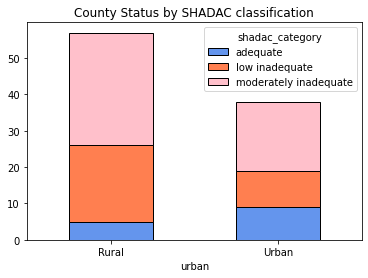

In [151]:
pd.crosstab(physicians['urban'], physicians['shadac_category']).plot(kind = 'bar', 
                                                          stacked = True,       # stacked as opposed to side-by-side
                                                          color = ['cornflowerblue', 'coral', 'pink'],     # change the default colors
                                                          edgecolor = 'black')              # add a border to the bars
plt.title('County Status by SHADAC classification')                   # add a title
plt.xticks(rotation = 0);                                             # change the appearance of the x tick labels

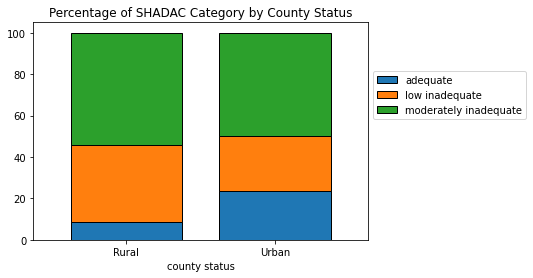

In [152]:
(pd.crosstab(physicians['urban'], physicians['shadac_category'],  normalize = 'index') * 100).plot(kind = 'bar', 
                                                                                        stacked = True,
                                                                                        edgecolor = 'black',
                                                                                        width = 0.75,
                                                                                       )
plt.title('Percentage of SHADAC Category by County Status')
plt.xlabel('county status')
plt.xticks(rotation = 0)
plt.legend(bbox_to_anchor = (1, 0.8), loc = 'upper left');   # move the legend to the right side of the plot
                                                            # the semicolon hides some matplotlib info that's not necessary

There are more adequate counties that are urban than rural; however, urban counties are not more likely to be adequate than moderately inadequate.  A counties' status as urban means it's less likely to be low inadequate than rural.

3. Merge the unemployment data (contained in tn_unemployment.csv) into the physicians DataFrame.

In [153]:
unemployment = pd.read_csv('../data/tn_unemployment.csv')

In [154]:
unemployment

,laus_code,State,County,Name,Period,LF,Employed,Unemployed,unemployment_rate
0,CN4700100000000,47,1,"Anderson County, TN",Mar-21,34704,33010,1694,4.9
1,CN4700300000000,47,3,"Bedford County, TN",Mar-21,20623,19550,1073,5.2
2,CN4700500000000,47,5,"Benton County, TN",Mar-21,6723,6305,418,6.2
3,CN4700700000000,47,7,"Bledsoe County, TN",Mar-21,4252,3947,305,7.2
4,CN4700900000000,47,9,"Blount County, TN",Mar-21,64098,61119,2979,4.6
...,...,...,...,...,...,...,...,...,...
90,CN4718100000000,47,181,"Wayne County, TN",Mar-21,6416,6074,342,5.3
91,CN4718300000000,47,183,"Weakley County, TN",Mar-21,15494,14783,711,4.6
92,CN4718500000000,47,185,"White County, TN",Mar-21,12085,11484,601,5.0
93,CN4718700000000,47,187,"Williamson County, TN",Mar-21,129484,125213,4271,3.3


In [155]:
physicians

,population,county,state,urban,primary_care_physicians,residents_per_pcp,shadac_category
0,183437,Sumner,TENNESSEE,Urban,91.0,2015.791209,moderately inadequate
1,10231,Trousdale,TENNESSEE,Urban,2.0,5115.500000,low inadequate
2,7654,Clay,TENNESSEE,Rural,2.0,3827.000000,low inadequate
3,936374,Shelby,TENNESSEE,Urban,806.0,1161.754342,adequate
4,27977,Henderson,TENNESSEE,Rural,7.0,3996.714286,low inadequate
...,...,...,...,...,...,...,...
90,46064,Monroe,TENNESSEE,Rural,9.0,5118.222222,low inadequate
91,32284,Henry,TENNESSEE,Rural,22.0,1467.454545,adequate
92,14399,Crockett,TENNESSEE,Rural,0.0,inf,low inadequate
93,7401,Lake,TENNESSEE,Rural,0.0,inf,low inadequate


In [156]:
unemployment['Name']=unemployment['Name'].str.split(' County', expand = True)[0]

can also add ' County', n = 1 to tell it how many times to delineate.  So if I just split on the space, it would only split on the first space.  if n=2, then it would split on teh first space between the first two words, adn then after teh space before TN.  then [0] tells to only show the first column, which is the first name in this case

In [157]:
unemployment

,laus_code,State,County,Name,Period,LF,Employed,Unemployed,unemployment_rate
0,CN4700100000000,47,1,Anderson,Mar-21,34704,33010,1694,4.9
1,CN4700300000000,47,3,Bedford,Mar-21,20623,19550,1073,5.2
2,CN4700500000000,47,5,Benton,Mar-21,6723,6305,418,6.2
3,CN4700700000000,47,7,Bledsoe,Mar-21,4252,3947,305,7.2
4,CN4700900000000,47,9,Blount,Mar-21,64098,61119,2979,4.6
...,...,...,...,...,...,...,...,...,...
90,CN4718100000000,47,181,Wayne,Mar-21,6416,6074,342,5.3
91,CN4718300000000,47,183,Weakley,Mar-21,15494,14783,711,4.6
92,CN4718500000000,47,185,White,Mar-21,12085,11484,601,5.0
93,CN4718700000000,47,187,Williamson,Mar-21,129484,125213,4271,3.3


In [158]:
physicians = pd.merge(left = physicians, right = unemployment, left_on = 'county', right_on = 'Name')

In [159]:
physicians

,population,county,state,urban,primary_care_physicians,residents_per_pcp,shadac_category,laus_code,State,County,Name,Period,LF,Employed,Unemployed,unemployment_rate
0,183437,Sumner,TENNESSEE,Urban,91.0,2015.791209,moderately inadequate,CN4716500000000,47,165,Sumner,Mar-21,103331,98879,4452,4.3
1,10231,Trousdale,TENNESSEE,Urban,2.0,5115.500000,low inadequate,CN4716900000000,47,169,Trousdale,Mar-21,5473,5217,256,4.7
2,7654,Clay,TENNESSEE,Rural,2.0,3827.000000,low inadequate,CN4702700000000,47,27,Clay,Mar-21,2743,2557,186,6.8
3,936374,Shelby,TENNESSEE,Urban,806.0,1161.754342,adequate,CN4715700000000,47,157,Shelby,Mar-21,448170,416726,31444,7.0
4,27977,Henderson,TENNESSEE,Rural,7.0,3996.714286,low inadequate,CN4707700000000,47,77,Henderson,Mar-21,11961,11323,638,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,46064,Monroe,TENNESSEE,Rural,9.0,5118.222222,low inadequate,CN4712300000000,47,123,Monroe,Mar-21,20185,19174,1011,5.0
91,32284,Henry,TENNESSEE,Rural,22.0,1467.454545,adequate,CN4707900000000,47,79,Henry,Mar-21,13331,12583,748,5.6
92,14399,Crockett,TENNESSEE,Rural,0.0,inf,low inadequate,CN4703300000000,47,33,Crockett,Mar-21,6838,6494,344,5.0
93,7401,Lake,TENNESSEE,Rural,0.0,inf,low inadequate,CN4709500000000,47,95,Lake,Mar-21,1694,1537,157,9.3


In [160]:
physicians = physicians[['population', 'county', 'urban', 'primary_care_physicians', 'residents_per_pcp', 'shadac_category', 'Period', 'LF', 'Employed', 'Unemployed', 'unemployment_rate']]

In [161]:
physicians

,population,county,urban,primary_care_physicians,residents_per_pcp,shadac_category,Period,LF,Employed,Unemployed,unemployment_rate
0,183437,Sumner,Urban,91.0,2015.791209,moderately inadequate,Mar-21,103331,98879,4452,4.3
1,10231,Trousdale,Urban,2.0,5115.500000,low inadequate,Mar-21,5473,5217,256,4.7
2,7654,Clay,Rural,2.0,3827.000000,low inadequate,Mar-21,2743,2557,186,6.8
3,936374,Shelby,Urban,806.0,1161.754342,adequate,Mar-21,448170,416726,31444,7.0
4,27977,Henderson,Rural,7.0,3996.714286,low inadequate,Mar-21,11961,11323,638,5.3
...,...,...,...,...,...,...,...,...,...,...,...
90,46064,Monroe,Rural,9.0,5118.222222,low inadequate,Mar-21,20185,19174,1011,5.0
91,32284,Henry,Rural,22.0,1467.454545,adequate,Mar-21,13331,12583,748,5.6
92,14399,Crockett,Rural,0.0,inf,low inadequate,Mar-21,6838,6494,344,5.0
93,7401,Lake,Rural,0.0,inf,low inadequate,Mar-21,1694,1537,157,9.3


4. How do unemployment rates compare for urban counties versus rural counties?

In [162]:
import seaborn as sns

In [163]:
physicians.groupby('urban')['unemployment_rate'].mean()

urban
Rural    5.850877
Urban    4.918421
Name: unemployment_rate, dtype: float64

In [164]:
physicians.groupby('urban')['unemployment_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
urban,,,,,,,,
Rural,57.0,5.850877,0.976349,3.7,5.200,5.60,6.500,9.3
Urban,38.0,4.918421,0.759749,3.3,4.325,4.85,5.375,7.1


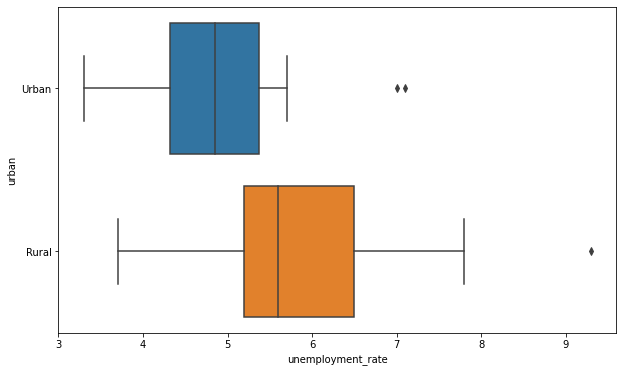

In [165]:
plt.figure(figsize = (10,6))

sns.boxplot(data = physicians,
           x = 'unemployment_rate',
           y = 'urban');

rural counties have a broader distribution of unemployment rates with a slightly higher median and average

5. Create a new column, `pcp_per_100k` which contains the number of primary care physicians per 100,000 residents. Investigate the relationship between this new measure and the unemployment rate per county. What do you find?



In [166]:
pop_per_100k = physicians['population']/100000

In [167]:
pcp_per_100k = physicians['primary_care_physicians'] / pop_per_100k

In [168]:
pcp_per_100k

0      49.608312
1      19.548431
2      26.130128
3      86.076717
4      25.020553
         ...    
90     19.538034
91     68.145211
92      0.000000
93      0.000000
94    112.772823
Length: 95, dtype: float64

In [169]:
physicians['pcp_per_100k'] = pcp_per_100k

/var/folders/7r/g_1t37f97bs1dn897jqjwls80000gn/T/ipykernel_5824/3836219438.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  physicians['pcp_per_100k'] = pcp_per_100k


In [170]:
physicians

,population,county,urban,primary_care_physicians,residents_per_pcp,shadac_category,Period,LF,Employed,Unemployed,unemployment_rate,pcp_per_100k
0,183437,Sumner,Urban,91.0,2015.791209,moderately inadequate,Mar-21,103331,98879,4452,4.3,49.608312
1,10231,Trousdale,Urban,2.0,5115.500000,low inadequate,Mar-21,5473,5217,256,4.7,19.548431
2,7654,Clay,Rural,2.0,3827.000000,low inadequate,Mar-21,2743,2557,186,6.8,26.130128
3,936374,Shelby,Urban,806.0,1161.754342,adequate,Mar-21,448170,416726,31444,7.0,86.076717
4,27977,Henderson,Rural,7.0,3996.714286,low inadequate,Mar-21,11961,11323,638,5.3,25.020553
...,...,...,...,...,...,...,...,...,...,...,...,...
90,46064,Monroe,Rural,9.0,5118.222222,low inadequate,Mar-21,20185,19174,1011,5.0,19.538034
91,32284,Henry,Rural,22.0,1467.454545,adequate,Mar-21,13331,12583,748,5.6,68.145211
92,14399,Crockett,Rural,0.0,inf,low inadequate,Mar-21,6838,6494,344,5.0,0.000000
93,7401,Lake,Rural,0.0,inf,low inadequate,Mar-21,1694,1537,157,9.3,0.000000


In [171]:
physicians[['pcp_per_100k', 'unemployment_rate', 'county']].corr()

,pcp_per_100k,unemployment_rate
pcp_per_100k,1.000000,-0.335333
unemployment_rate,-0.335333,1.000000


In [172]:
physicians.groupby('county')['unemployment_rate', 'pcp_per_100k'].mean()


/var/folders/7r/g_1t37f97bs1dn897jqjwls80000gn/T/ipykernel_5824/1826340372.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  physicians.groupby('county')['unemployment_rate', 'pcp_per_100k'].mean()


,unemployment_rate,pcp_per_100k
county,,
Anderson,4.9,51.274635
Bedford,5.2,31.061045
Benton,6.2,18.587361
Bledsoe,7.2,6.740361
Blount,4.6,69.269667
...,...,...
Wayne,5.3,29.952675
Weakley,4.6,53.715309
White,5.0,33.582090


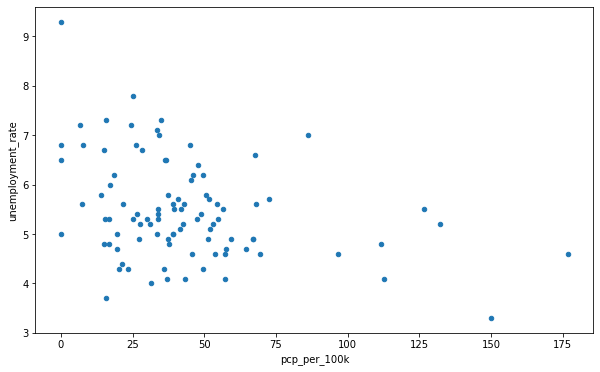

In [173]:
physicians.plot(kind = 'scatter',
             x = 'pcp_per_100k',
             y = 'unemployment_rate',
             figsize = (10,6));

In [174]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

1. Create a choropleth showing the unemployment rate per county for each Tennessee county.

In [175]:
counties = gpd.read_file('../data/county/tncounty.shp')

In [176]:
counties.head()

,OBJECTID,NAME,KEY,SHAPE_AREA,SHAPE_LEN,geometry
0,76,Chester,47023,8.049024e+09,520461.080124,"POLYGON ((1137985.762 344601.643, 1137965.070 ..."
1,77,Wayne,47181,2.050741e+10,666520.678598,"POLYGON ((1365052.057 391716.806, 1365746.554 ..."
2,78,Tipton,47167,1.319125e+10,865093.887634,"MULTIPOLYGON (((886814.330 400456.525, 886774...."
3,79,Hamilton,47065,1.604776e+10,652926.001078,"POLYGON ((2274954.438 239788.911, 2274090.610 ..."
4,80,Stewart,47161,1.375003e+10,490090.336180,"POLYGON ((1382472.783 743972.302, 1382445.171 ..."


!!!!! When merging a geospacial dataframe with something else, always have the geo datafram on the left, otherwise it wont work


In [177]:
counties = pd.merge(left = counties,
                    right = physicians,
                   left_on = 'NAME',
                   right_on = 'county')
counties.head()



,OBJECTID,NAME,KEY,SHAPE_AREA,SHAPE_LEN,geometry,population,county,urban,primary_care_physicians,residents_per_pcp,shadac_category,Period,LF,Employed,Unemployed,unemployment_rate,pcp_per_100k
0,76,Chester,47023,8.049024e+09,520461.080124,"POLYGON ((1137985.762 344601.643, 1137965.070 ...",17190,Chester,Urban,4.0,4297.500000,low inadequate,Mar-21,8424,8062,362,4.3,23.269343
1,77,Wayne,47181,2.050741e+10,666520.678598,"POLYGON ((1365052.057 391716.806, 1365746.554 ...",16693,Wayne,Rural,5.0,3338.600000,moderately inadequate,Mar-21,6416,6074,342,5.3,29.952675
2,78,Tipton,47167,1.319125e+10,865093.887634,"MULTIPOLYGON (((886814.330 400456.525, 886774....",61447,Tipton,Urban,17.0,3614.529412,low inadequate,Mar-21,27741,26295,1446,5.2,27.666119
3,79,Hamilton,47065,1.604776e+10,652926.001078,"POLYGON ((2274954.438 239788.911, 2274090.610 ...",360919,Hamilton,Urban,403.0,895.580645,adequate,Mar-21,182548,173702,8846,4.8,111.659403
4,80,Stewart,47161,1.375003e+10,490090.336180,"POLYGON ((1382472.783 743972.302, 1382445.171 ...",13427,Stewart,Urban,1.0,13427.000000,low inadequate,Mar-21,5451,5146,305,5.6,7.447680


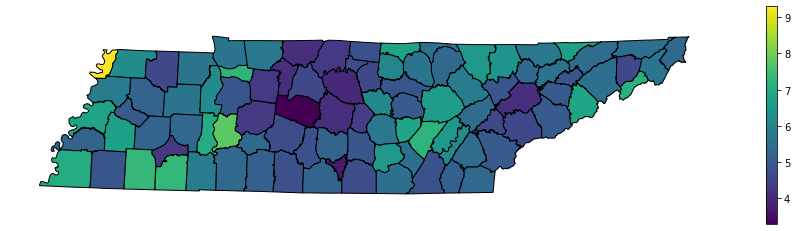

In [178]:
fig, ax = plt.subplots(figsize=(16,4))
counties.plot(column = 'unemployment_rate', 
              edgecolor = 'black', 
              legend = True,
              ax = ax)
ax.axis('off');

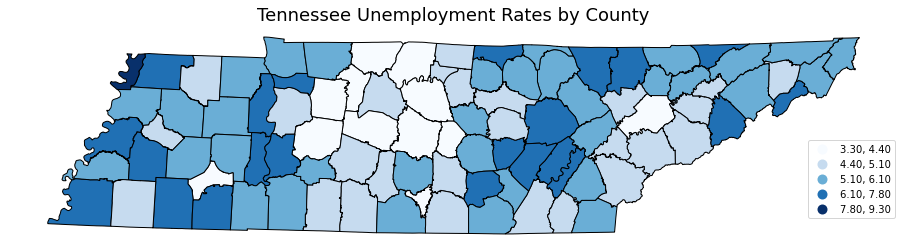

In [179]:
fig, ax = plt.subplots(figsize=(16,4))

counties.plot(column = 'unemployment_rate', 
              edgecolor = 'black', 
              legend = True,
              cmap = 'Blues',
              scheme="NaturalBreaks",
              ax = ax)

# Position the legend
leg = ax.get_legend()
leg.set_bbox_to_anchor((1, 0.5))

# Add a title
plt.title('Tennessee Unemployment Rates by County', fontsize = 18)

ax.axis('off');

2. Create a choropleth showing the SHADAC category for each county (adequate, low inadequate, and moderately inadequate).

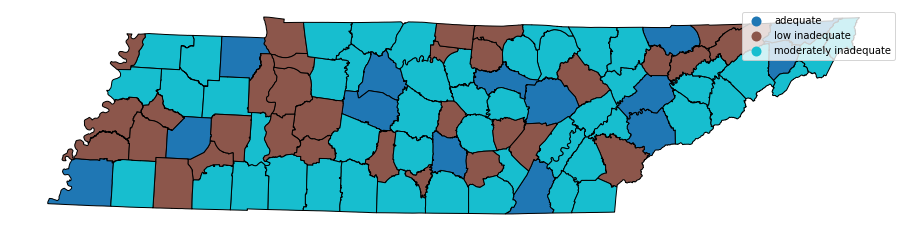

In [180]:
fig, ax = plt.subplots(figsize=(16,4))
counties.plot(column = 'shadac_category', 
              edgecolor = 'black', 
              legend = True,
              ax = ax)
ax.axis('off');

 3. After creating the choropleth, you can start working on addressing the first two questions for TN Med Helper described in the project README. There are a few files in the data folder that can be helpful for this:
  * Medicare_Disparities_by_Population - This folder contains data obtained from the [Centers for Medicare and Medicaid Services](https://data.cms.gov/tools/mapping-medicare-disparities-by-population), as described in the README.
  * County_Health_Rankings - This folder contains the [2020 County Health Rankings](https://www.countyhealthrankings.org/).
  * Closures-Database-for-Web.xlsx, which contains a dataset of rural hospital closures, obtained from [UNC's Sheps Center](https://www.shepscenter.unc.edu/programs-projects/rural-health/rural-hospital-closures/). 
  

In [181]:
annual_wellness = pd.read_csv('../data/Medicare_Disparities_by_population/annual_wellness.csv')
emergency_department = pd.read_csv('../data/Medicare_Disparities_by_population/emergency_department.csv')
hospitalizations = pd.read_csv('../data/Medicare_Disparities_by_population/hospitalizations.csv')

In [182]:
annual_wellness.head()

,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_eligibility,primary_denominator,analysis_value
0,2019,County,Preventive Services,Unsmoothed actual,Base measure,Preventive Services,Annual Wellness Visit,All,All,Dual & non-dual,1001,Autauga County,ALABAMA,Urban,All,All,"1,000-4,999",29
1,2019,County,Preventive Services,Unsmoothed actual,Base measure,Preventive Services,Annual Wellness Visit,All,All,Dual & non-dual,1003,Baldwin County,ALABAMA,Rural,All,All,"10,000+",29
2,2019,County,Preventive Services,Unsmoothed actual,Base measure,Preventive Services,Annual Wellness Visit,All,All,Dual & non-dual,1005,Barbour County,ALABAMA,Rural,All,All,"1,000-4,999",21
3,2019,County,Preventive Services,Unsmoothed actual,Base measure,Preventive Services,Annual Wellness Visit,All,All,Dual & non-dual,1007,Bibb County,ALABAMA,Urban,All,All,"1,000-4,999",39
4,2019,County,Preventive Services,Unsmoothed actual,Base measure,Preventive Services,Annual Wellness Visit,All,All,Dual & non-dual,1009,Blount County,ALABAMA,Urban,All,All,"1,000-4,999",37


In [183]:
emergency_department.head()

,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_eligibility,primary_denominator,analysis_value
0,2019,County,Emergency department visit rate,Unsmoothed actual,Base measure,Primary chronic conditions,All Emergency Department Visits,All,All,Dual & non-dual,1001,Autauga County,ALABAMA,Urban,All,All,undefined,723
1,2019,County,Emergency department visit rate,Unsmoothed actual,Base measure,Primary chronic conditions,All Emergency Department Visits,All,All,Dual & non-dual,1003,Baldwin County,ALABAMA,Rural,All,All,undefined,601
2,2019,County,Emergency department visit rate,Unsmoothed actual,Base measure,Primary chronic conditions,All Emergency Department Visits,All,All,Dual & non-dual,1005,Barbour County,ALABAMA,Rural,All,All,undefined,929
3,2019,County,Emergency department visit rate,Unsmoothed actual,Base measure,Primary chronic conditions,All Emergency Department Visits,All,All,Dual & non-dual,1007,Bibb County,ALABAMA,Urban,All,All,undefined,787
4,2019,County,Emergency department visit rate,Unsmoothed actual,Base measure,Primary chronic conditions,All Emergency Department Visits,All,All,Dual & non-dual,1009,Blount County,ALABAMA,Urban,All,All,undefined,714


In [184]:
hospitalizations.head()

,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_eligibility,primary_denominator,analysis_value
0,2019,County,Hospitalization,Unsmoothed actual,Base measure,Primary chronic conditions,All-Cause Hospitalizations,All,All,Dual & non-dual,1001,Autauga County,ALABAMA,Urban,All,All,"5,000-9,999",299
1,2019,County,Hospitalization,Unsmoothed actual,Base measure,Primary chronic conditions,All-Cause Hospitalizations,All,All,Dual & non-dual,1003,Baldwin County,ALABAMA,Rural,All,All,"10,000+",268
2,2019,County,Hospitalization,Unsmoothed actual,Base measure,Primary chronic conditions,All-Cause Hospitalizations,All,All,Dual & non-dual,1005,Barbour County,ALABAMA,Rural,All,All,"1,000-4,999",329
3,2019,County,Hospitalization,Unsmoothed actual,Base measure,Primary chronic conditions,All-Cause Hospitalizations,All,All,Dual & non-dual,1007,Bibb County,ALABAMA,Urban,All,All,"1,000-4,999",355
4,2019,County,Hospitalization,Unsmoothed actual,Base measure,Primary chronic conditions,All-Cause Hospitalizations,All,All,Dual & non-dual,1009,Blount County,ALABAMA,Urban,All,All,"1,000-4,999",301


In [185]:
annual_wellness = annual_wellness.loc[annual_wellness['state'] == 'TENNESSEE']

emergency_department = emergency_department.loc[emergency_department['state'] == 'TENNESSEE']

hospitalizations = hospitalizations.loc[hospitalizations['state'] == 'TENNESSEE']

In [186]:
annual_wellness.head()

,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_eligibility,primary_denominator,analysis_value
2428,2019,County,Preventive Services,Unsmoothed actual,Base measure,Preventive Services,Annual Wellness Visit,All,All,Dual & non-dual,47001,Anderson County,TENNESSEE,Urban,All,All,"5,000-9,999",35
2429,2019,County,Preventive Services,Unsmoothed actual,Base measure,Preventive Services,Annual Wellness Visit,All,All,Dual & non-dual,47003,Bedford County,TENNESSEE,Rural,All,All,"1,000-4,999",46
2430,2019,County,Preventive Services,Unsmoothed actual,Base measure,Preventive Services,Annual Wellness Visit,All,All,Dual & non-dual,47005,Benton County,TENNESSEE,Rural,All,All,"1,000-4,999",30
2431,2019,County,Preventive Services,Unsmoothed actual,Base measure,Preventive Services,Annual Wellness Visit,All,All,Dual & non-dual,47007,Bledsoe County,TENNESSEE,Rural,All,All,"1,000-4,999",19
2432,2019,County,Preventive Services,Unsmoothed actual,Base measure,Preventive Services,Annual Wellness Visit,All,All,Dual & non-dual,47009,Blount County,TENNESSEE,Urban,All,All,"10,000+",43


In [187]:
emergency_department.head()

,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_eligibility,primary_denominator,analysis_value
2428,2019,County,Emergency department visit rate,Unsmoothed actual,Base measure,Primary chronic conditions,All Emergency Department Visits,All,All,Dual & non-dual,47001,Anderson County,TENNESSEE,Urban,All,All,undefined,617
2429,2019,County,Emergency department visit rate,Unsmoothed actual,Base measure,Primary chronic conditions,All Emergency Department Visits,All,All,Dual & non-dual,47003,Bedford County,TENNESSEE,Rural,All,All,undefined,646
2430,2019,County,Emergency department visit rate,Unsmoothed actual,Base measure,Primary chronic conditions,All Emergency Department Visits,All,All,Dual & non-dual,47005,Benton County,TENNESSEE,Rural,All,All,undefined,783
2431,2019,County,Emergency department visit rate,Unsmoothed actual,Base measure,Primary chronic conditions,All Emergency Department Visits,All,All,Dual & non-dual,47007,Bledsoe County,TENNESSEE,Rural,All,All,undefined,750
2432,2019,County,Emergency department visit rate,Unsmoothed actual,Base measure,Primary chronic conditions,All Emergency Department Visits,All,All,Dual & non-dual,47009,Blount County,TENNESSEE,Urban,All,All,undefined,581


In [188]:
emergency_department = emergency_department[['measure', 'domain', 'condition', 'county', 'urban', 'primary_denominator', 'analysis_value']]

annual_wellness = annual_wellness[['measure', 'domain', 'condition', 'county', 'urban', 'primary_denominator', 'analysis_value']]

hospitalizations = hospitalizations[['measure', 'domain', 'condition', 'county', 'urban', 'primary_denominator', 'analysis_value']]

In [189]:
emergency_department.head()


,measure,domain,condition,county,urban,primary_denominator,analysis_value
2428,Emergency department visit rate,Primary chronic conditions,All Emergency Department Visits,Anderson County,Urban,undefined,617
2429,Emergency department visit rate,Primary chronic conditions,All Emergency Department Visits,Bedford County,Rural,undefined,646
2430,Emergency department visit rate,Primary chronic conditions,All Emergency Department Visits,Benton County,Rural,undefined,783
2431,Emergency department visit rate,Primary chronic conditions,All Emergency Department Visits,Bledsoe County,Rural,undefined,750
2432,Emergency department visit rate,Primary chronic conditions,All Emergency Department Visits,Blount County,Urban,undefined,581


From the ReadMe: question 1: ID which counties in TN have the most severe lack of acces to healthcare hospitals.csv primary care physicians, closures database for web, county health rankings

question 2 medicare disparities by population

question 3 brfss data linked in week 5 material

In [190]:
physicians.head()

,population,county,urban,primary_care_physicians,residents_per_pcp,shadac_category,Period,LF,Employed,Unemployed,unemployment_rate,pcp_per_100k
0,183437,Sumner,Urban,91.0,2015.791209,moderately inadequate,Mar-21,103331,98879,4452,4.3,49.608312
1,10231,Trousdale,Urban,2.0,5115.500000,low inadequate,Mar-21,5473,5217,256,4.7,19.548431
2,7654,Clay,Rural,2.0,3827.000000,low inadequate,Mar-21,2743,2557,186,6.8,26.130128
3,936374,Shelby,Urban,806.0,1161.754342,adequate,Mar-21,448170,416726,31444,7.0,86.076717
4,27977,Henderson,Rural,7.0,3996.714286,low inadequate,Mar-21,11961,11323,638,5.3,25.020553


In [191]:
physicians['county'] = physicians['county'] + " County"

/var/folders/7r/g_1t37f97bs1dn897jqjwls80000gn/T/ipykernel_5824/1577841376.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  physicians['county'] = physicians['county'] + " County"


In [192]:
physicians.head()

,population,county,urban,primary_care_physicians,residents_per_pcp,shadac_category,Period,LF,Employed,Unemployed,unemployment_rate,pcp_per_100k
0,183437,Sumner County,Urban,91.0,2015.791209,moderately inadequate,Mar-21,103331,98879,4452,4.3,49.608312
1,10231,Trousdale County,Urban,2.0,5115.500000,low inadequate,Mar-21,5473,5217,256,4.7,19.548431
2,7654,Clay County,Rural,2.0,3827.000000,low inadequate,Mar-21,2743,2557,186,6.8,26.130128
3,936374,Shelby County,Urban,806.0,1161.754342,adequate,Mar-21,448170,416726,31444,7.0,86.076717
4,27977,Henderson County,Rural,7.0,3996.714286,low inadequate,Mar-21,11961,11323,638,5.3,25.020553


In [193]:
physicians = pd.merge(left = physicians,
                    right = emergency_department,
                   left_on = 'county',
                   right_on = 'county')

In [194]:
physicians.head()

,population,county,urban_x,primary_care_physicians,residents_per_pcp,shadac_category,Period,LF,Employed,Unemployed,unemployment_rate,pcp_per_100k,measure,domain,condition,urban_y,primary_denominator,analysis_value
0,183437,Sumner County,Urban,91.0,2015.791209,moderately inadequate,Mar-21,103331,98879,4452,4.3,49.608312,Emergency department visit rate,Primary chronic conditions,All Emergency Department Visits,Urban,undefined,712
1,10231,Trousdale County,Urban,2.0,5115.500000,low inadequate,Mar-21,5473,5217,256,4.7,19.548431,Emergency department visit rate,Primary chronic conditions,All Emergency Department Visits,Urban,undefined,946
2,7654,Clay County,Rural,2.0,3827.000000,low inadequate,Mar-21,2743,2557,186,6.8,26.130128,Emergency department visit rate,Primary chronic conditions,All Emergency Department Visits,Rural,undefined,699
3,936374,Shelby County,Urban,806.0,1161.754342,adequate,Mar-21,448170,416726,31444,7.0,86.076717,Emergency department visit rate,Primary chronic conditions,All Emergency Department Visits,Urban,undefined,695
4,27977,Henderson County,Rural,7.0,3996.714286,low inadequate,Mar-21,11961,11323,638,5.3,25.020553,Emergency department visit rate,Primary chronic conditions,All Emergency Department Visits,Rural,undefined,795


In [195]:
EDphysicians = physicians[['county', 'urban_x', 'shadac_category', 'unemployment_rate', 'pcp_per_100k', 'measure', 'analysis_value']]

In [196]:
EDphysicians.head()

,county,urban_x,shadac_category,unemployment_rate,pcp_per_100k,measure,analysis_value
0,Sumner County,Urban,moderately inadequate,4.3,49.608312,Emergency department visit rate,712
1,Trousdale County,Urban,low inadequate,4.7,19.548431,Emergency department visit rate,946
2,Clay County,Rural,low inadequate,6.8,26.130128,Emergency department visit rate,699
3,Shelby County,Urban,adequate,7.0,86.076717,Emergency department visit rate,695
4,Henderson County,Rural,low inadequate,5.3,25.020553,Emergency department visit rate,795


In [197]:
EDphysicians.info

<bound method DataFrame.info of               county urban_x        shadac_category  unemployment_rate  \
0      Sumner County   Urban  moderately inadequate                4.3   
1   Trousdale County   Urban         low inadequate                4.7   
2        Clay County   Rural         low inadequate                6.8   
3      Shelby County   Urban               adequate                7.0   
4   Henderson County   Rural         low inadequate                5.3   
..               ...     ...                    ...                ...   
90     Monroe County   Rural         low inadequate                5.0   
91      Henry County   Rural               adequate                5.6   
92   Crockett County   Rural         low inadequate                5.0   
93       Lake County   Rural         low inadequate                9.3   
94       Knox County   Urban               adequate                4.1   

    pcp_per_100k                          measure  analysis_value  
0      49.6

In [198]:
hospitals = pd.read_csv('../data/Hospitals.csv')

In [199]:
hospitals.head()

,X,Y,OBJECTID,ID,NAME,ADDRESS,CITY,STATE,ZIP,ZIP4,...,VAL_DATE,WEBSITE,STATE_ID,ALT_NAME,ST_FIPS,OWNER,TTL_STAFF,BEDS,TRAUMA,HELIPAD
0,-1.331889e+07,4.346975e+06,1,5793230,CENTRAL VALLEY GENERAL HOSPITAL,1025 NORTH DOUTY STREET,HANFORD,CA,93230,NOT AVAILABLE,...,2014/02/10 00:00:00,http://www.hanfordhealth.com,NOT AVAILABLE,NOT AVAILABLE,6,PROPRIETARY,-999,49,NOT AVAILABLE,N
1,-1.322651e+07,4.049626e+06,2,53391362,LOS ROBLES HOSPITAL & MEDICAL CENTER - EAST CA...,150 VIA MERIDA,WESTLAKE VILAGE,CA,91362,NOT AVAILABLE,...,2014/02/10 00:00:00,http://www.losrobleshospital.com,NOT AVAILABLE,NOT AVAILABLE,6,PROPRIETARY,-999,62,NOT AVAILABLE,N
2,-1.315620e+07,4.031978e+06,3,11190023,EAST LOS ANGELES DOCTORS HOSPITAL,4060 WHITTIER BOULEVARD,LOS ANGELES,CA,90023,NOT AVAILABLE,...,2014/02/10 00:00:00,http://www.elalax.com,NOT AVAILABLE,NOT AVAILABLE,6,PROPRIETARY,-999,127,NOT AVAILABLE,N
3,-1.317190e+07,4.041752e+06,4,17090028,SOUTHERN CALIFORNIA HOSPITAL AT HOLLYWOOD,6245 DE LONGPRE AVENUE,HOLLYWOOD,CA,90028,NOT AVAILABLE,...,2014/02/10 00:00:00,http://sch-hollywood.com/,NOT AVAILABLE,HOLLYWOOD COMMUNITY HOSPITAL OF HOLLYWOOD,6,PROPRIETARY,-999,100,NOT AVAILABLE,N
4,-1.313208e+07,4.037270e+06,5,23691706,KINDRED HOSPITAL BALDWIN PARK,14148 FRANCISQUITO AVENUE,BALDWIN PARK,CA,91706,NOT AVAILABLE,...,2014/02/10 00:00:00,http://www.khbaldwinpark.com,NOT AVAILABLE,NOT AVAILABLE,6,PROPRIETARY,-999,95,NOT AVAILABLE,N


In [200]:
hospitals = hospitals.loc[hospitals['STATE'] == 'TN']

In [201]:
hospitals

,X,Y,OBJECTID,ID,NAME,ADDRESS,CITY,STATE,ZIP,ZIP4,...,VAL_DATE,WEBSITE,STATE_ID,ALT_NAME,ST_FIPS,OWNER,TTL_STAFF,BEDS,TRAUMA,HELIPAD
515,-9.409026e+06,4.210878e+06,517,14737331,STARR REGIONAL MEDICAL CENTER ETOWAH,886 HIGHWAY 411 NORTH,ETOWAH,TN,37331,NOT AVAILABLE,...,2014/02/10 00:00:00,http://www.starrregional.com/,NOT AVAILABLE,WOODS MEMORIAL HOSPITAL,47,NON-PROFIT,-999,72,LEVEL III,Y
535,-9.535209e+06,4.348723e+06,537,3438562,JACKSON COUNTY HOSPITAL,620 HOSPITAL DRIVE,GAINESBORO,TN,38562,NOT AVAILABLE,...,2014/02/12 00:00:00,NOT AVAILABLE,477446,NOT AVAILABLE,47,NON-PROFIT,-999,-999,NOT AVAILABLE,N
536,-9.692242e+06,4.246701e+06,538,8038401,MAURY REGIONAL HOSPITAL,1224 TROTWOOD AVENUE,COLUMBIA,TN,38401,NOT AVAILABLE,...,2014/02/10 00:00:00,http://www.mauryregional.com,490443,NOT AVAILABLE,47,GOVERNMENT - LOCAL,-999,255,NOT AVAILABLE,N
537,-9.891187e+06,4.257288e+06,539,8338305,WEST TENNESSEE HEALTHCARE NORTH HOSPITAL,367 HOSPITAL BLVD.,JACKSON,TN,38305,NOT AVAILABLE,...,2014/02/10 00:00:00,http://www.tennovawest.com/locations/tennova-h...,76774,NOT AVAILABLE,47,PROPRIETARY,-999,152,NOT AVAILABLE,Y
540,-9.830658e+06,4.341502e+06,542,6538242,HENRY COUNTY MEDICAL CENTER,301 TYSON AVENUE,PARIS,TN,38242,NOT AVAILABLE,...,2014/02/10 00:00:00,http://www.hcmc-tn.org,862759,NOT AVAILABLE,47,GOVERNMENT - DISTRICT/AUTHORITY,-999,142,NOT AVAILABLE,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6810,-9.630429e+06,4.377577e+06,6823,2637148,TRISTAR PORTLAND MEDICAL PARK,105 RED BUD DR,PORTLAND,TN,37148,NOT AVAILABLE,...,2014/02/12 00:00:00,http://tristarportlander.com/,583205,TENNESSEE CHRISTIAN MEDICAL CENTER PORTLAND,47,NON-PROFIT,-999,159,NOT AVAILABLE,Y
6811,-9.636394e+06,4.297187e+06,6824,10737167,TRISTAR STONECREST MEDICAL CENTER,200 STONECREST BOULEVARD,SMYRNA,TN,37167,NOT AVAILABLE,...,2014/02/10 00:00:00,http://tristarstonecrest.com/,662440,NOT AVAILABLE,47,PROPRIETARY,-999,109,NOT AVAILABLE,Y
6812,-9.174179e+06,4.319023e+06,6825,10137650,UNICOI COUNTY MEMORIAL HOSPITAL,100 GREENWAY CIRCLE,ERWIN,TN,37650,NOT AVAILABLE,...,2014/02/10 00:00:00,http://www.ucmhnet.org,687194,NOT AVAILABLE,47,NON-PROFIT,-999,10,NOT AVAILABLE,Y
6813,-9.662773e+06,4.320018e+06,6826,15837232,VANDERBILT UNIVERSITY HOSPITAL,1211 MEDICAL CENTER DRIVE,NASHVILLE,TN,37232,NOT AVAILABLE,...,2014/02/10 00:00:00,http://www.mc.vanderbilt.edu/,NOT AVAILABLE,NOT AVAILABLE,47,NON-PROFIT,-999,1091,LEVEL I,Y


In [202]:
OGphys = pd.read_csv('../data/primary_care_physicians.csv')

In [203]:
OGphys

,FIPS,state,county,primary_care_physicians
0,1001,Alabama,Autauga,26.0
1,1003,Alabama,Baldwin,153.0
2,1005,Alabama,Barbour,8.0
3,1007,Alabama,Bibb,12.0
4,1009,Alabama,Blount,12.0
...,...,...,...,...
3225,72151,Puerto Rico,Yabucoa,5.0
3226,72153,Puerto Rico,Yauco,43.0
3227,78010,US Virgin Islands,St. Croix,14.0
3228,78020,US Virgin Islands,St. John,1.0
